In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from pydataset import data

# # module for visualizations
# import viz_kmeans as vk

# my imports
import wrangle_lugo_copy as w

In [2]:
df = w.get_wine_data()

In [3]:
df = w.prep_wine_data(df)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_white_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red_wine,0
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red_wine,0
2,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red_wine,0
3,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red_wine,0
4,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red_wine,0


In [5]:
# dropping these columns for right now until I find a use for them
# df = df.drop(columns =['wine_type','wine_type_white_wine'])
df = df.drop(columns =['wine_type'])

In [6]:
tr, val, ts = w.get_split(df)
tr.shape, val.shape, ts.shape

((3378, 13), (1126, 13), (1126, 13))

In [7]:
target = 'quality'
X_tr, X_val, X_ts, y_tr, y_val, y_ts, to_scale, baseline = w.get_Xs_ys_to_scale_baseline(tr, val, ts, target)
baseline

5.867377146240379

In [8]:
X_tr_sc, X_val_sc, X_ts_sc = w.scale_data(X_tr,X_val,X_ts,to_scale)
X_tr_sc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,wine_type_white_wine
2336,0.285714,0.526316,0.476190,0.252475,0.322581,0.267442,0.333333,0.329293,0.82,0.537313,0.696429,1.0
3295,0.476190,0.526316,0.444444,0.435644,0.505376,0.325581,0.641304,0.594613,0.45,0.268657,0.178571,1.0
3018,0.571429,0.270677,0.825397,0.623762,0.408602,0.732558,0.626812,0.746801,0.38,0.313433,0.107143,1.0
3712,0.428571,0.496241,0.492063,0.049505,0.354839,0.197674,0.344203,0.325926,0.41,0.238806,0.375000,1.0
4948,0.476190,0.240602,0.634921,0.732673,0.462366,0.930233,0.695652,0.773737,0.48,0.656716,0.178571,1.0


In [9]:
## ABOVE is from Rosendo; now I explore

In [10]:
import corey_explore as ce

In [11]:
tr.head().T

,2336,3295,3018,3712,4948
fixed_acidity,5.700,6.90000,7.5000,6.60000,6.9000
volatile_acidity,0.430,0.43000,0.2600,0.41000,0.2400
citric_acid,0.300,0.28000,0.5200,0.31000,0.4000
residual_sugar,5.700,9.40000,13.2000,1.60000,15.4000
chlorides,0.039,0.05600,0.0470,0.04200,0.0520
free_sulfur_dioxide,24.000,29.00000,64.0000,18.00000,81.0000
total_sulfur_dioxide,98.000,183.00000,179.0000,101.00000,198.0000
density,0.992,0.99594,0.9982,0.99195,0.9986
ph,3.540,3.17000,3.1000,3.13000,3.2000
sulphates,0.610,0.43000,0.4600,0.41000,0.6900


In [12]:
wine_corr = tr.corr()
wine_corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine
fixed_acidity,1.000000,0.184528,0.222014,-0.046879,0.366731,-0.184794,-0.182726,0.380595,-0.262537,0.162212,-0.142757,-0.099324,-0.367778
volatile_acidity,0.184528,1.000000,-0.460411,-0.189299,0.504305,-0.348819,-0.400544,0.203533,0.248925,0.206489,-0.019722,-0.232037,-0.651995
citric_acid,0.222014,-0.460411,1.000000,0.165323,-0.213161,0.208377,0.288760,0.005892,-0.286020,-0.039633,0.026039,0.109794,0.318760
residual_sugar,-0.046879,-0.189299,0.165323,1.000000,-0.104039,0.437943,0.498015,0.624906,-0.284264,-0.151775,-0.398710,-0.051198,0.318425
chlorides,0.366731,0.504305,-0.213161,-0.104039,1.000000,-0.251531,-0.339137,0.524948,0.244482,0.344149,-0.368440,-0.271426,-0.744545
free_sulfur_dioxide,-0.184794,-0.348819,0.208377,0.437943,-0.251531,1.000000,0.707619,0.135802,-0.173309,-0.140681,-0.192024,0.075344,0.431400
total_sulfur_dioxide,-0.182726,-0.400544,0.288760,0.498015,-0.339137,0.707619,1.000000,0.160108,-0.271162,-0.217290,-0.288652,-0.046843,0.653413
density,0.380595,0.203533,0.005892,0.624906,0.524948,0.135802,0.160108,1.000000,0.039801,0.209468,-0.770281,-0.327809,-0.320644
ph,-0.262537,0.248925,-0.286020,-0.284264,0.244482,-0.173309,-0.271162,0.039801,1.000000,0.299363,0.080941,0.034522,-0.391020
sulphates,0.162212,0.206489,-0.039633,-0.151775,0.344149,-0.140681,-0.217290,0.209468,0.299363,1.000000,-0.010792,0.056060,-0.439033


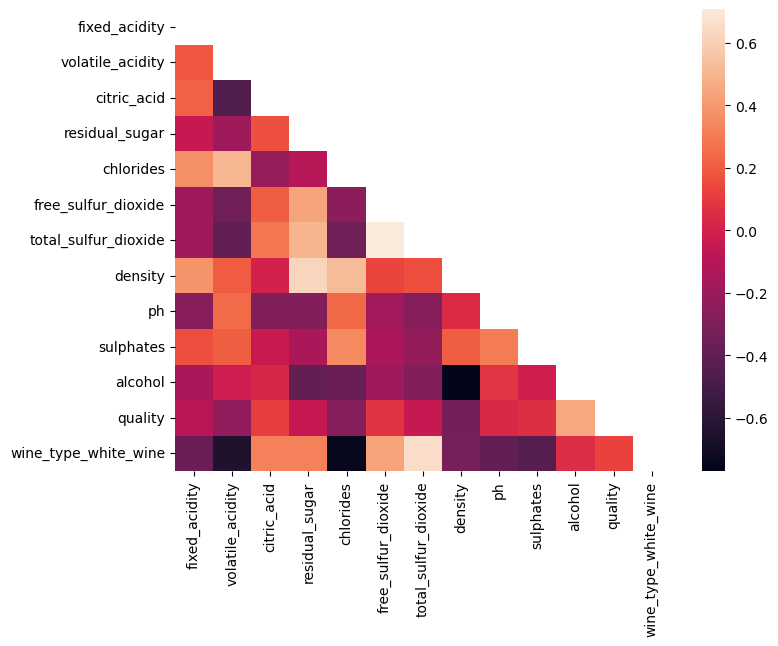

In [13]:
# Next, pass correlation matrix to sns.heatmap
plt.figure(figsize=(8,6))
sns.heatmap(wine_corr, mask=np.triu(wine_corr))
plt.show()

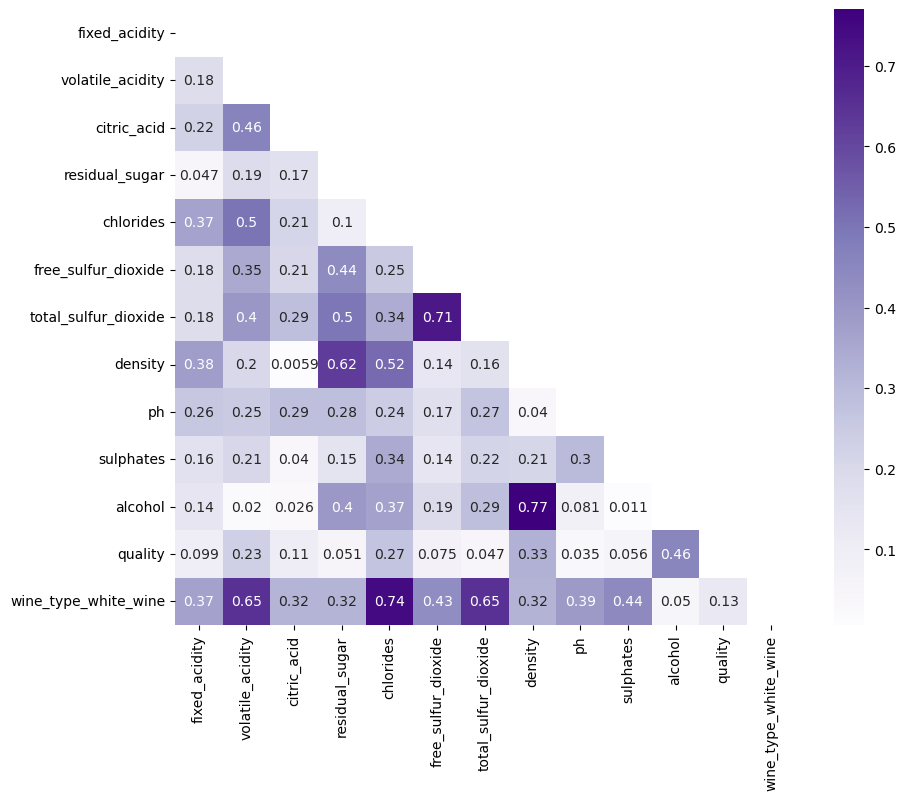

In [14]:
# Next, pass correlation matrix to sns.heatmap ## Could do annotate=True to get 
plt.figure(figsize=(10,8))
sns.heatmap(wine_corr.abs(), cmap='Purples', annot=True, mask=np.triu(wine_corr))
plt.show()

In [15]:
# make a list of the feature/column names to conduct vis/stat tests on
features = list(tr.drop(columns = [target]).columns)
features

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'wine_type_white_wine']

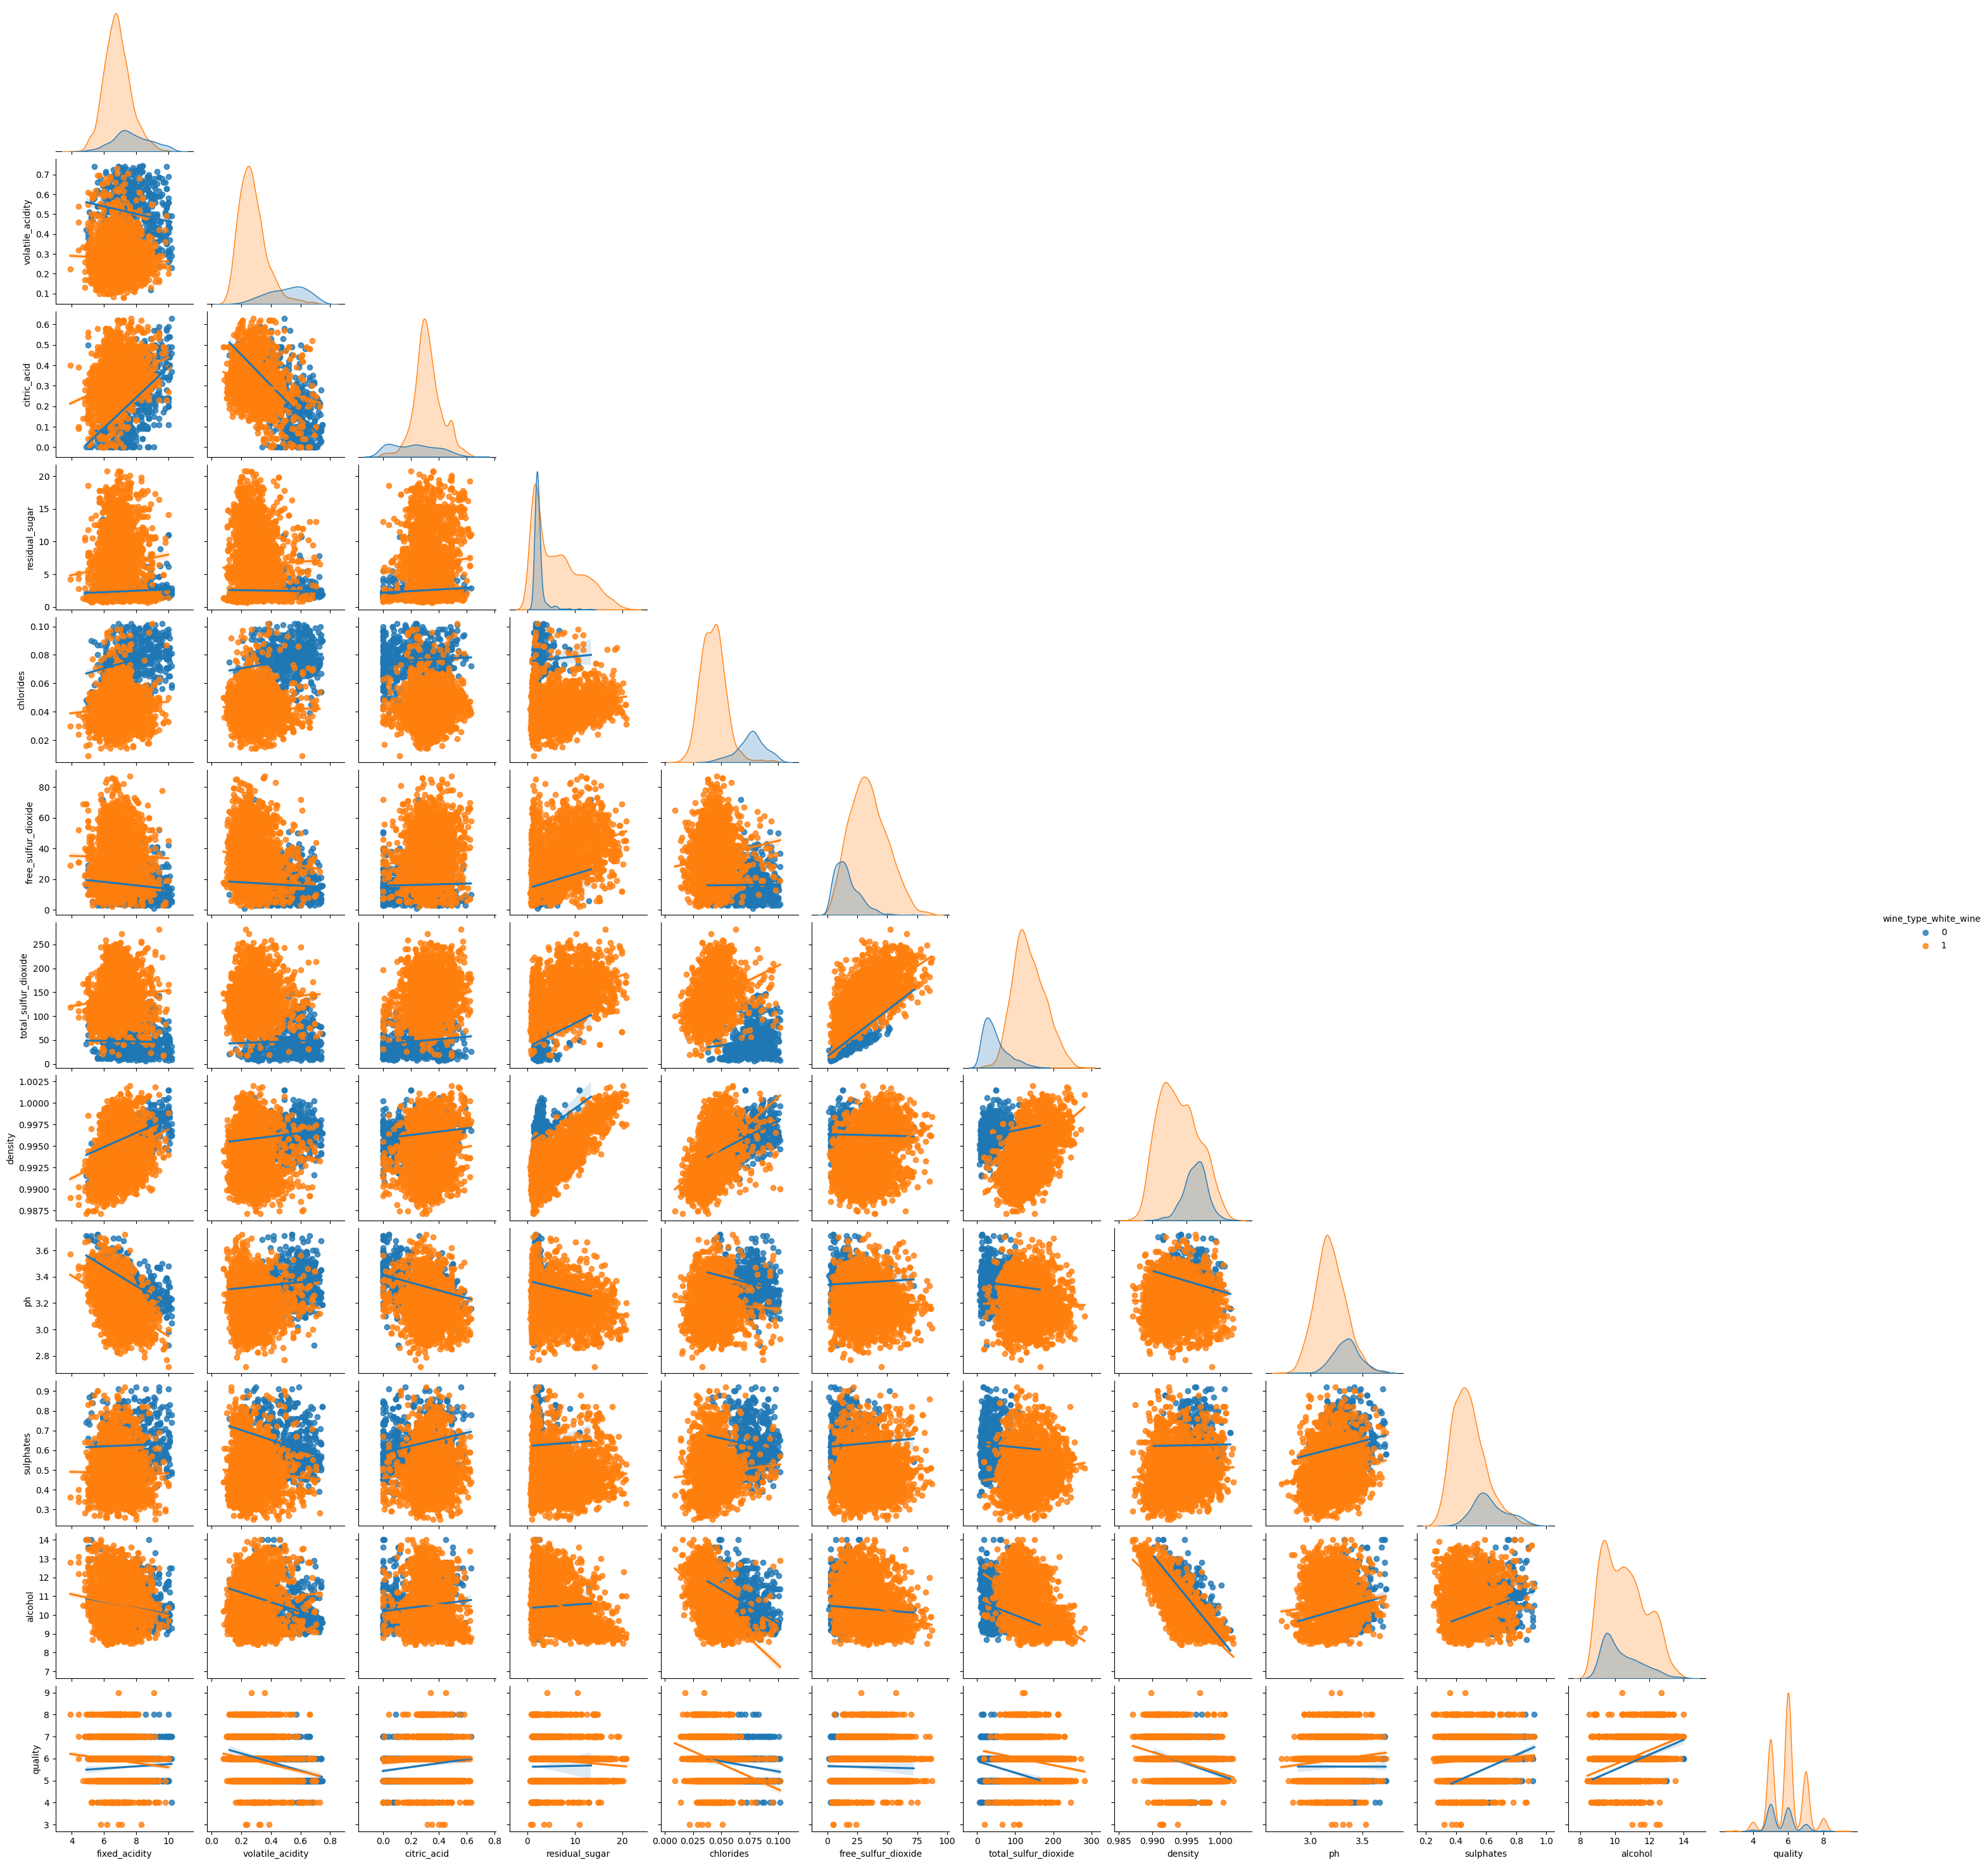

In [16]:
sns.pairplot(data=tr, kind='reg', corner=True, hue='wine_type_white_wine')
plt.show()

In [17]:
from scipy.stats import levene
from scipy.stats import spearmanr

In [18]:
# all variables are continuous and I want to compare them to quality, a continuous variable
# pairplot showed roughly normal dist for all but residual_sugar, but I have > 500 observations; so normal
# BUT, a levene test showed equal_variance to be false for all, so use spearmanr
# - Spearmanr for the stat test to check for correlation 
# - H0: the feature-target pair is not correlated, Ha: they are correlated

# will check for equal variance with levene test 
# - from documentation: "small p-value suggests that the populations do not have equal variances"
# - H0: feature-target pair have equal variance, Ha: not equal variance
# - a p < .05 suggests not equal variance and we will set that value to False in the SpearmansR test

def get_spearmanr_regplots(df, target):
    """
    This function will
    - accept a dataframe with continuous variables and the target column, also continuous
    - accept a string which is the name of the target column
    - prints regplots of each feature vs the target
    - returns a dataframe with results of levene test for equal variance and spearmanr 
      test for correlation on each feature vs target
    """
    # target = 'quality'
    features = list(df.drop(columns = [target]).columns)
    results_list = []

    for col in features:
        lt, lp = levene(df[col], df[target])
        if lp < .05: 
            eq_var = False
        else: 
            eq_var = True

        t, p = spearmanr(df[col], df[target])

        sns.regplot(df[col], df[target], scatter_kws = {"color": "black", "alpha": 0.5}
                    , line_kws = {"color": "red"})
        if p < .05:
            plt.title('p < alpha: suggest H_a (correlated)')
            p_string = 'REJECT H0, suggests H_a (correlated)'
        else:
            plt.title('p >= alpha: cannot reject H_0 (not correlated)')
            p_string = 'CANNOT reject H0 (no correlation)'
        plt.show()

        results_list.append([col, lp, eq_var, t, p, p_string])

    results_df = pd.DataFrame(results_list, columns=['column','levene p', 'equal_var', 'spearmanr t'
                                                     , 'spearmanr p', 'hypothesis result'])
    return results_df

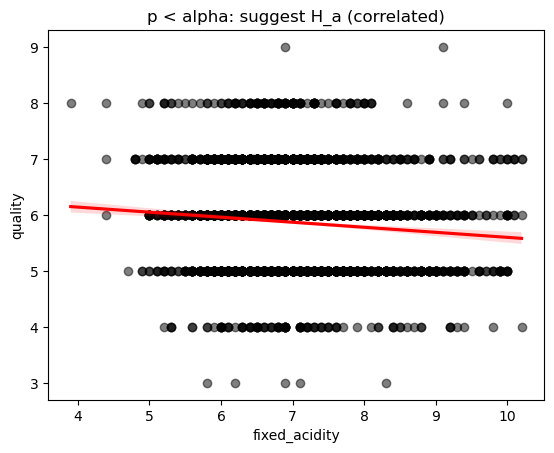

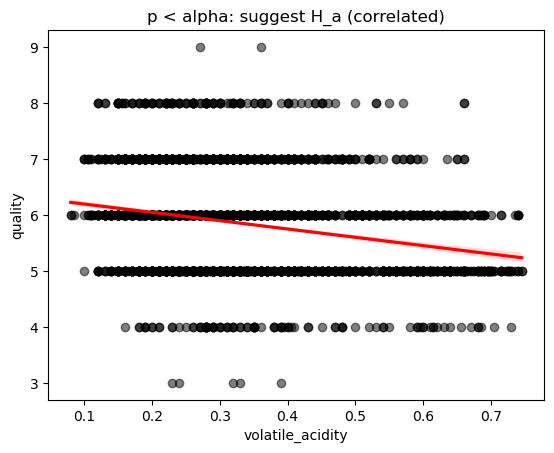

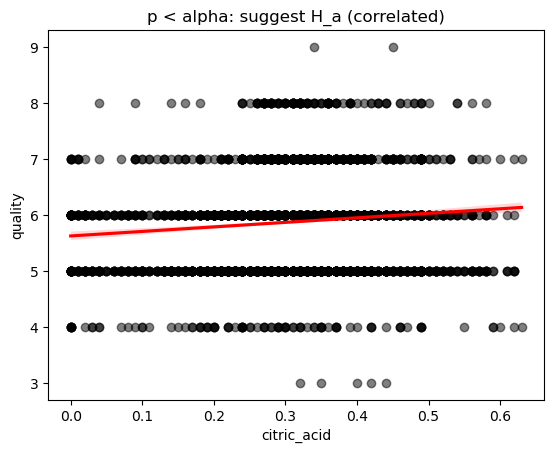

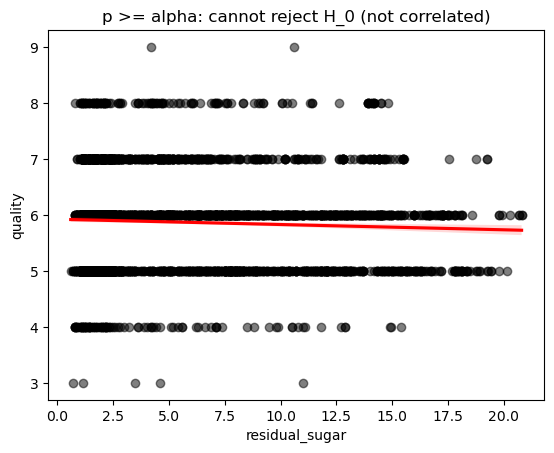

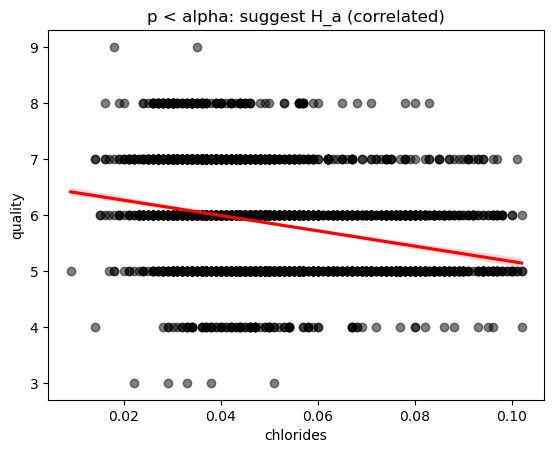

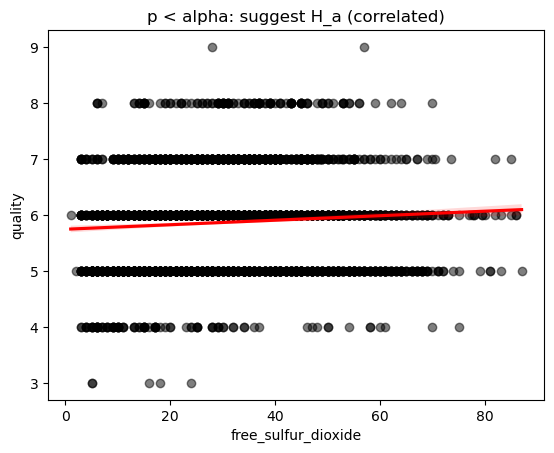

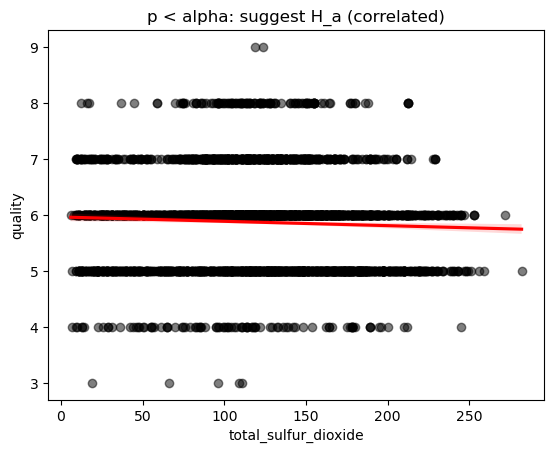

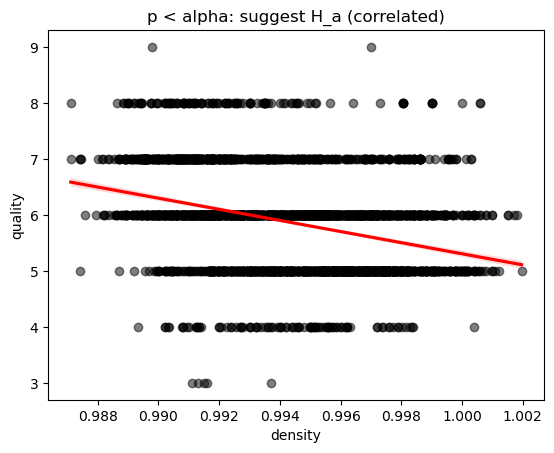

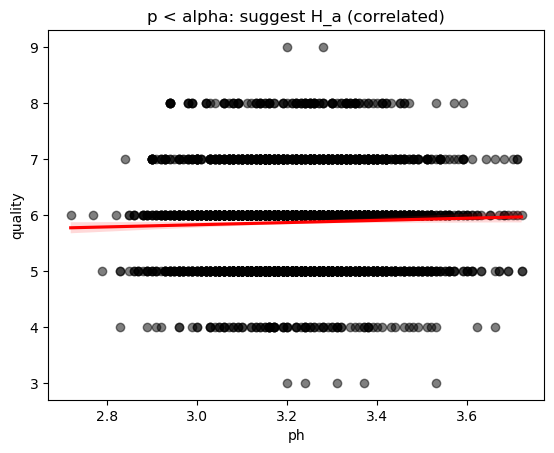

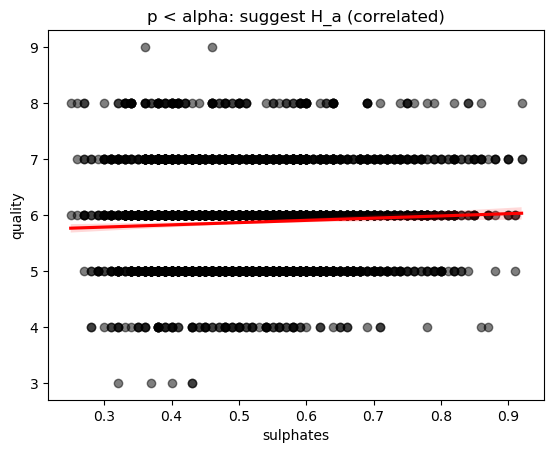

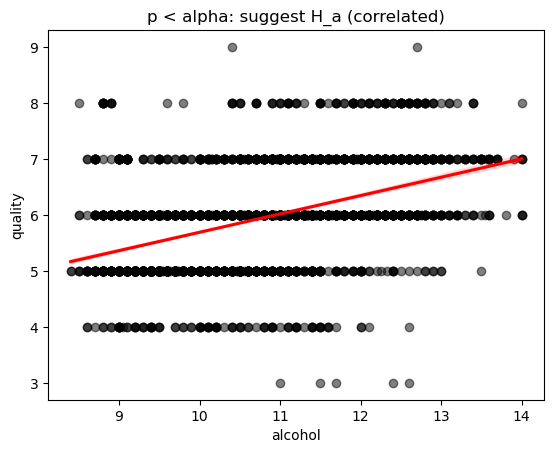

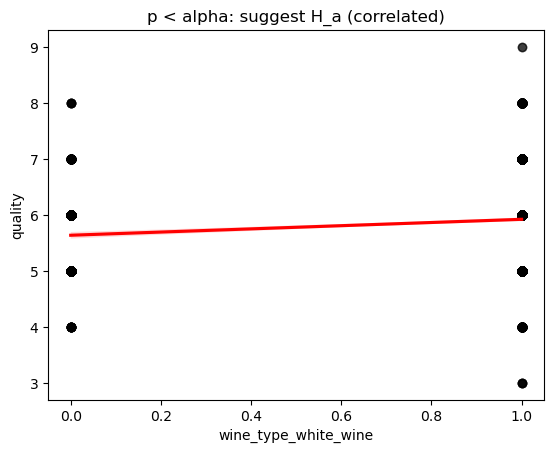

,column,levene p,equal_var,spearmanr t,spearmanr p,hypothesis result
0,fixed_acidity,8.540429e-11,False,-0.094003,4.409316e-08,"REJECT H0, suggests H_a (correlated)"
1,volatile_acidity,0.000000e+00,False,-0.234938,1.385305e-43,"REJECT H0, suggests H_a (correlated)"
2,citric_acid,0.000000e+00,False,0.119492,3.229909e-12,"REJECT H0, suggests H_a (correlated)"
3,residual_sugar,0.000000e+00,False,-0.029566,8.577753e-02,CANNOT reject H0 (no correlation)
4,chlorides,0.000000e+00,False,-0.314516,1.902966e-78,"REJECT H0, suggests H_a (correlated)"
5,free_sulfur_dioxide,0.000000e+00,False,0.091264,1.075687e-07,"REJECT H0, suggests H_a (correlated)"
6,total_sulfur_dioxide,0.000000e+00,False,-0.068898,6.131864e-05,"REJECT H0, suggests H_a (correlated)"
7,density,0.000000e+00,False,-0.347302,2.328684e-96,"REJECT H0, suggests H_a (correlated)"
8,ph,0.000000e+00,False,0.045900,7.627276e-03,"REJECT H0, suggests H_a (correlated)"
9,sulphates,0.000000e+00,False,0.034406,4.554647e-02,"REJECT H0, suggests H_a (correlated)"


In [19]:
get_spearmanr_regplots(tr, 'quality')

In [20]:
# -.8 for t (very highly correlated; maybe take out density and just use alcohol)
spearmanr(tr.alcohol, tr.density)

SpearmanrResult(correlation=-0.7729668005975888, pvalue=0.0)

In [21]:
X_tr_sc.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,wine_type_white_wine
2336,0.285714,0.526316,0.476190,0.252475,0.322581,0.267442,0.333333,0.329293,0.82,0.537313,0.696429,1.0
3295,0.476190,0.526316,0.444444,0.435644,0.505376,0.325581,0.641304,0.594613,0.45,0.268657,0.178571,1.0
3018,0.571429,0.270677,0.825397,0.623762,0.408602,0.732558,0.626812,0.746801,0.38,0.313433,0.107143,1.0
3712,0.428571,0.496241,0.492063,0.049505,0.354839,0.197674,0.344203,0.325926,0.41,0.238806,0.375000,1.0
4948,0.476190,0.240602,0.634921,0.732673,0.462366,0.930233,0.695652,0.773737,0.48,0.656716,0.178571,1.0


In [22]:
# free sulfur dioxide and sulphates were not correlated, and
# density is highly correlated with alcohol (repeated info)
drop_cols = ['free_sulfur_dioxide', 'sulphates', 'density']
drop_cols = ['residual_sugar', 'density']

In [36]:
ce.get_kbest_multi(X_tr_sc, y_tr)

,Feature,KBest Rank,KBest Scores
0,alcohol,1,889.785570
1,density,2,406.458454
2,chlorides,3,268.497955
3,volatile_acidity,4,192.111591
4,wine_type_white_wine,5,54.370987
5,citric_acid,6,41.193683
6,fixed_acidity,7,33.637017
7,free_sulfur_dioxide,8,19.274032
8,sulphates,9,10.643120
9,residual_sugar,10,8.872617


In [24]:
ce.get_rfe_multi(X_tr_sc.drop(columns=drop_cols), y_tr)

,Feature,RFE Rank
8,alcohol,1
1,volatile_acidity,2
7,sulphates,3
4,free_sulfur_dioxide,4
5,total_sulfur_dioxide,5
3,chlorides,6
6,ph,7
0,fixed_acidity,8
9,wine_type_white_wine,9
2,citric_acid,10


In [25]:
# now I want to do all of that with separate databases (red vs white)
red_tr = tr[tr.wine_type_white_wine == 0]
white_tr = tr[tr.wine_type_white_wine == 1]

In [26]:
red_tr.shape, white_tr.shape

((613, 13), (2765, 13))

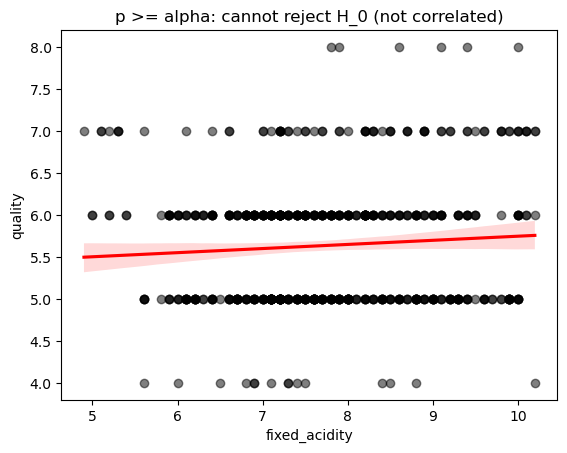

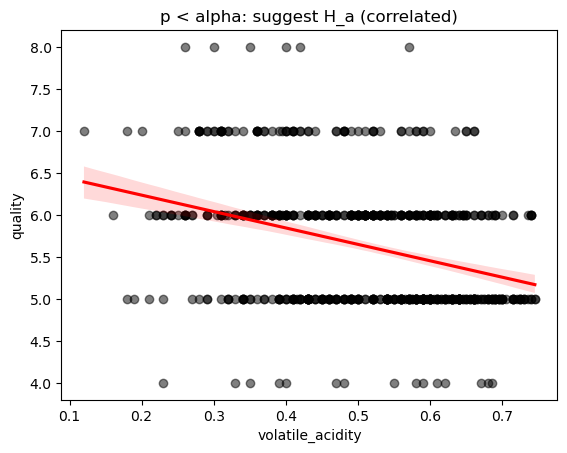

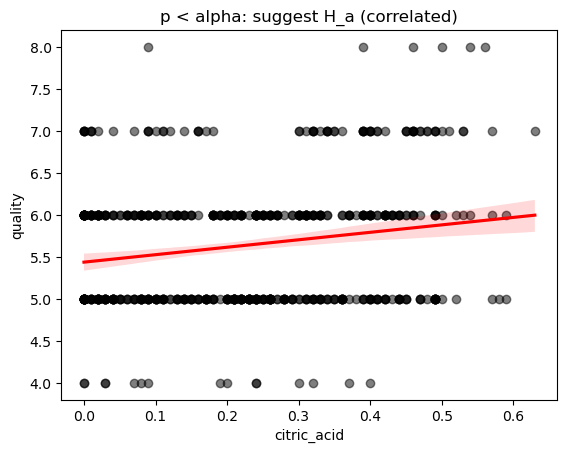

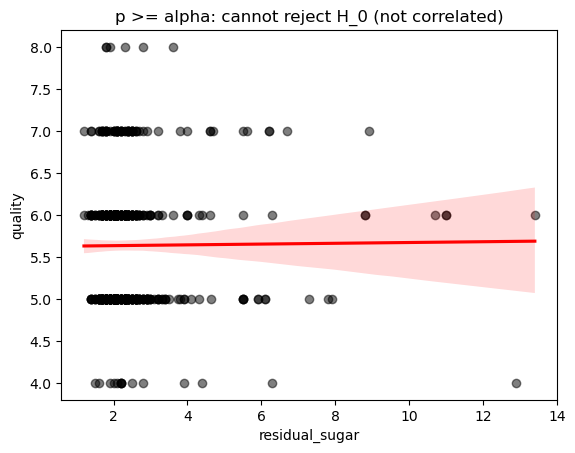

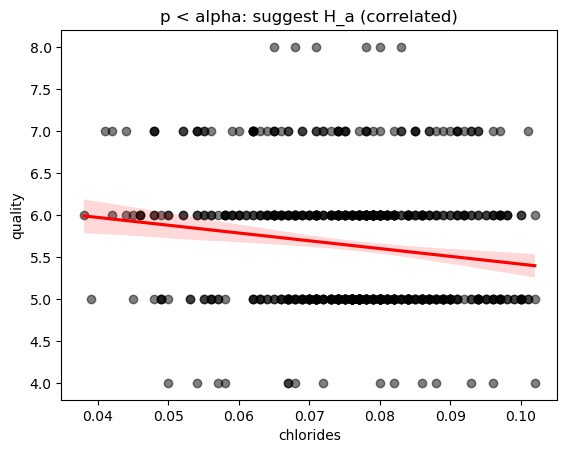

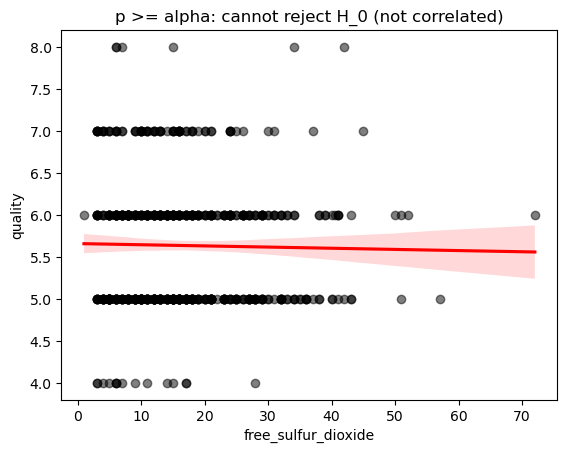

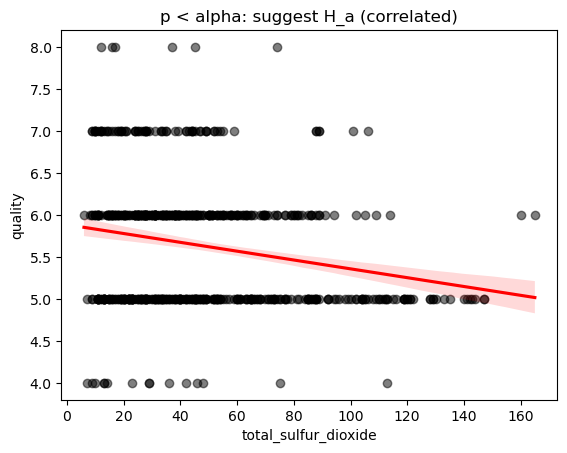

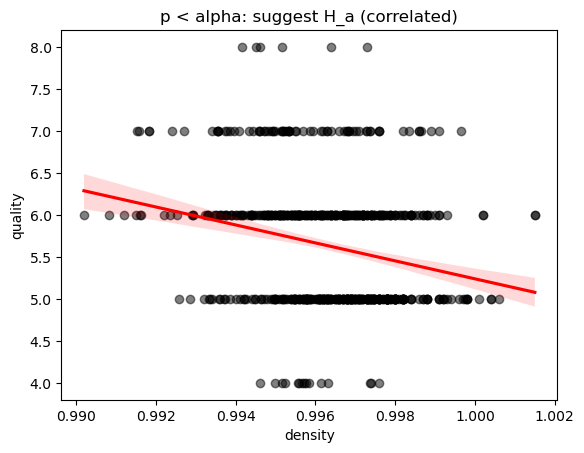

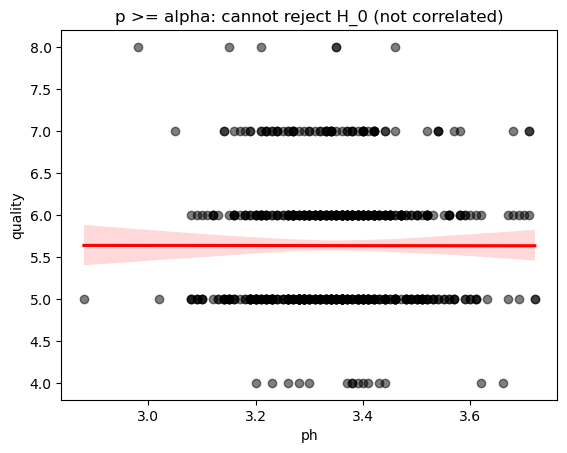

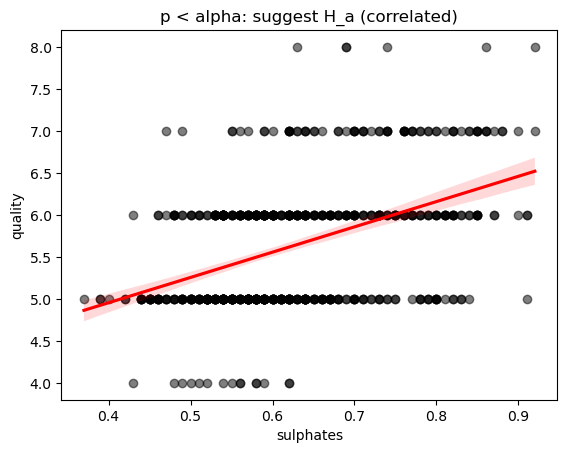

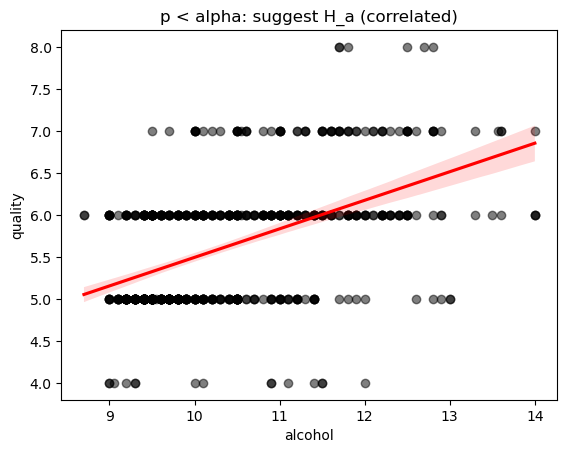

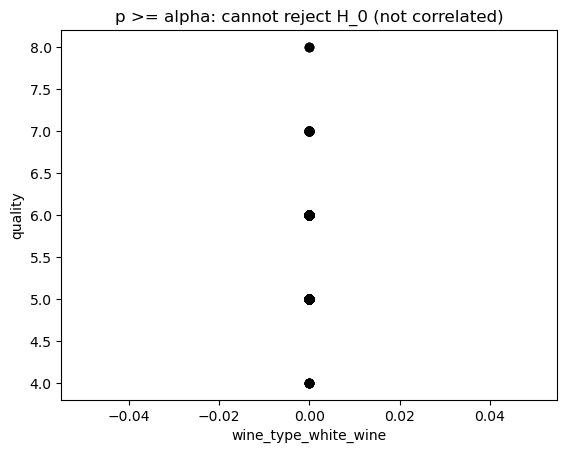

,column,levene p,equal_var,spearmanr t,spearmanr p,hypothesis result
0,fixed_acidity,1.321483e-15,False,0.057941,1.519080e-01,CANNOT reject H0 (no correlation)
1,volatile_acidity,5.115796e-103,False,-0.340242,4.448436e-18,"REJECT H0, suggests H_a (correlated)"
2,citric_acid,9.647944e-95,False,0.143863,3.526342e-04,"REJECT H0, suggests H_a (correlated)"
3,residual_sugar,5.501476e-01,True,-0.002139,9.578527e-01,CANNOT reject H0 (no correlation)
4,chlorides,2.180246e-137,False,-0.145265,3.080795e-04,"REJECT H0, suggests H_a (correlated)"
5,free_sulfur_dioxide,2.798645e-111,False,-0.021510,5.950408e-01,CANNOT reject H0 (no correlation)
6,total_sulfur_dioxide,1.272700e-116,False,-0.193676,1.356906e-06,"REJECT H0, suggests H_a (correlated)"
7,density,3.344853e-140,False,-0.243819,9.541710e-10,"REJECT H0, suggests H_a (correlated)"
8,ph,1.685772e-105,False,0.022226,5.828470e-01,CANNOT reject H0 (no correlation)
9,sulphates,4.443479e-110,False,0.417908,2.616717e-27,"REJECT H0, suggests H_a (correlated)"


In [27]:
get_spearmanr_regplots(red_tr, 'quality')

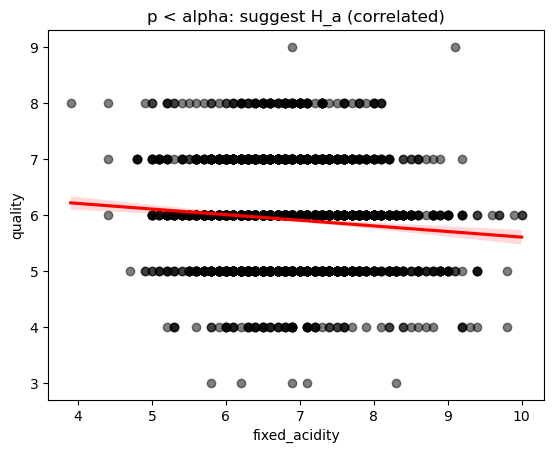

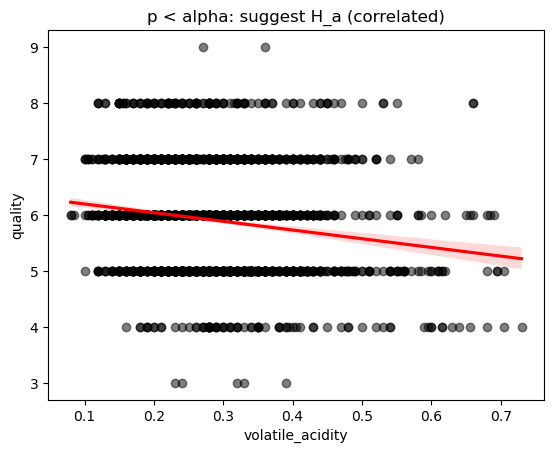

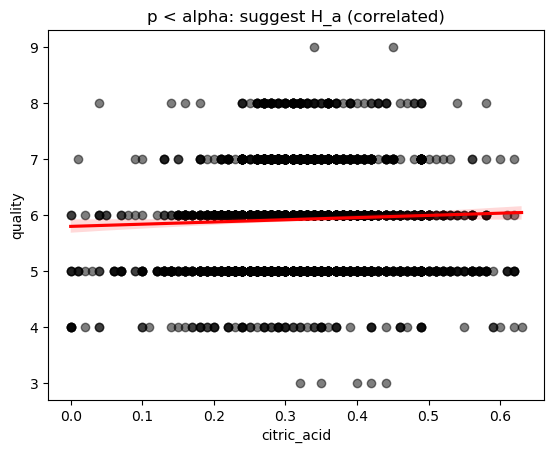

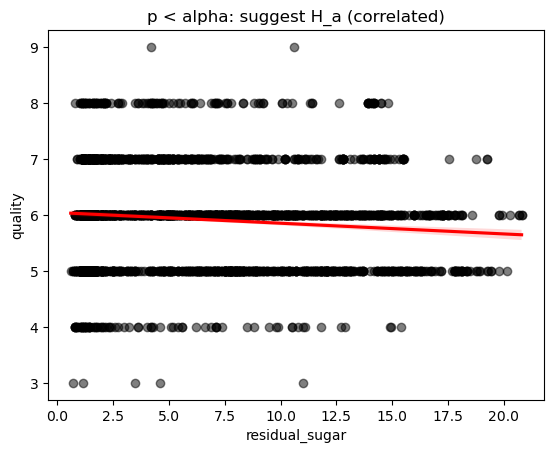

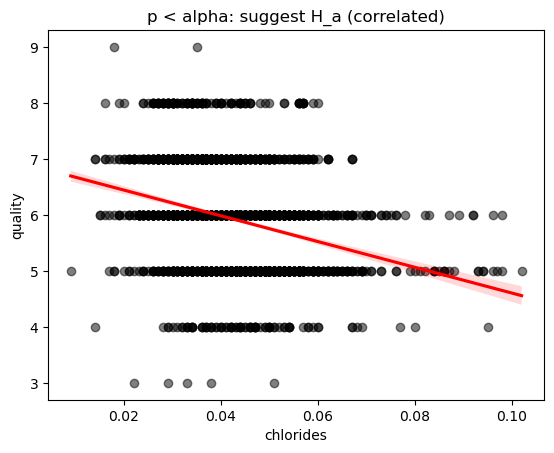

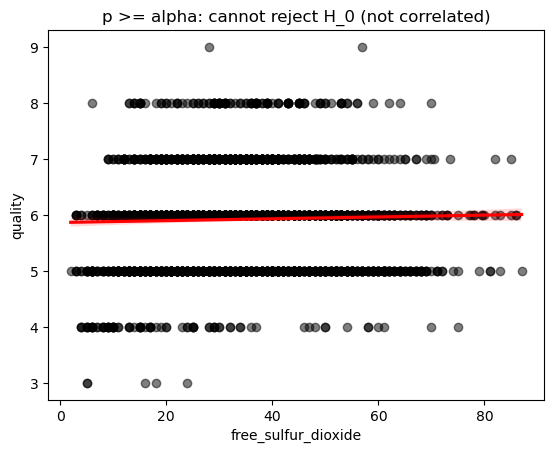

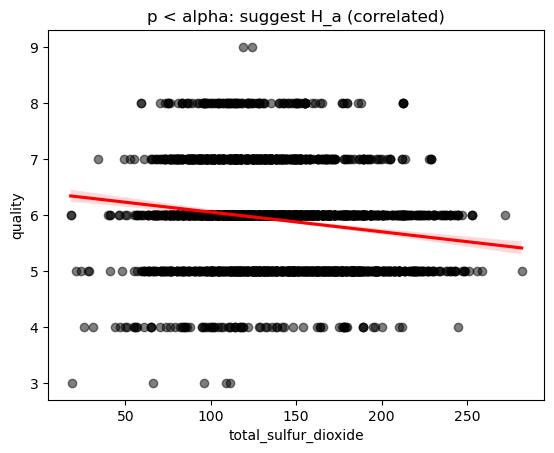

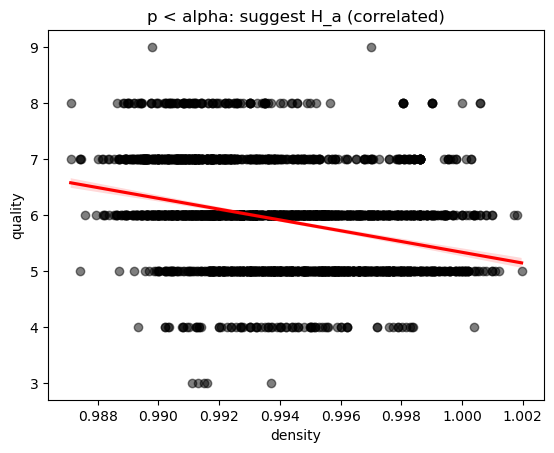

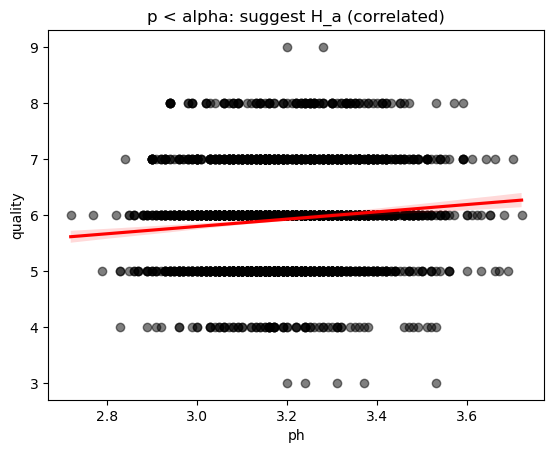

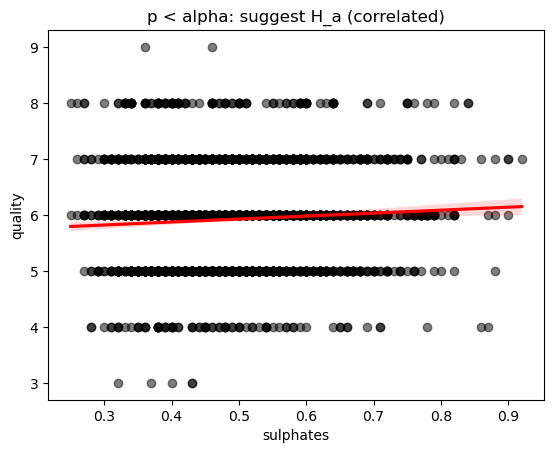

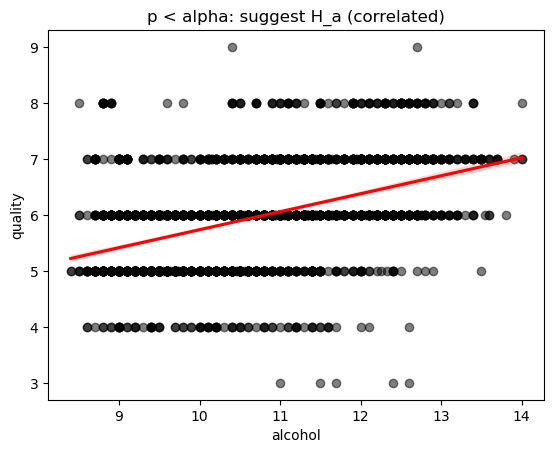

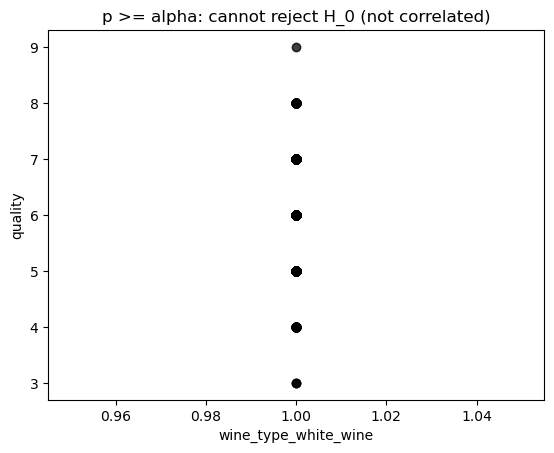

,column,levene p,equal_var,spearmanr t,spearmanr p,hypothesis result
0,fixed_acidity,8.277424e-01,True,-0.070755,1.964793e-04,"REJECT H0, suggests H_a (correlated)"
1,volatile_acidity,0.000000e+00,False,-0.177593,5.003762e-21,"REJECT H0, suggests H_a (correlated)"
2,citric_acid,0.000000e+00,False,0.056727,2.845622e-03,"REJECT H0, suggests H_a (correlated)"
3,residual_sugar,0.000000e+00,False,-0.089824,2.237812e-06,"REJECT H0, suggests H_a (correlated)"
4,chlorides,0.000000e+00,False,-0.320187,6.004043e-67,"REJECT H0, suggests H_a (correlated)"
5,free_sulfur_dioxide,0.000000e+00,False,0.024392,1.997640e-01,CANNOT reject H0 (no correlation)
6,total_sulfur_dioxide,0.000000e+00,False,-0.194596,5.335031e-25,"REJECT H0, suggests H_a (correlated)"
7,density,0.000000e+00,False,-0.353195,4.898222e-82,"REJECT H0, suggests H_a (correlated)"
8,ph,0.000000e+00,False,0.115620,1.078021e-09,"REJECT H0, suggests H_a (correlated)"
9,sulphates,0.000000e+00,False,0.052701,5.573203e-03,"REJECT H0, suggests H_a (correlated)"


In [28]:
get_spearmanr_regplots(white_tr, 'quality')

In [29]:
# kbest for red wines
##### CAN't DO unless I redo y_tr to be only red wine quality scores, too #####
#ce.get_kbest_multi(X_tr_sc[X_tr_sc.wine_type_white_wine == 0].drop(columns=drop_cols), y_tr)

In [30]:
# which stat test to use for comparing clusters (category) vs quality 
# we've been treating quality as continuous, but that is arguable

# categorical vs continuous, normally distributed, (equal variance?

from scipy.stats import levene # equal_variance check (low p -> False)
from scipy.stats import f_oneway # for ANOVA test of > 2 groups
from scipy.stats import ttest_ind  # for 2 tailed ttest
from scipy.stats import ttest_1samp # for 1 tailed ttest

In [31]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine
2336,5.7,0.43,0.30,5.7,0.039,24.0,98.0,0.99200,3.54,0.61,12.3,7,1
3295,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5,1
3018,7.5,0.26,0.52,13.2,0.047,64.0,179.0,0.99820,3.10,0.46,9.0,5,1
3712,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,5,1
4948,6.9,0.24,0.40,15.4,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,5,1


In [32]:
import os

In [33]:
tr.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type_white_wine
2336,5.7,0.43,0.30,5.7,0.039,24.0,98.0,0.99200,3.54,0.61,12.3,7,1
3295,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5,1
3018,7.5,0.26,0.52,13.2,0.047,64.0,179.0,0.99820,3.10,0.46,9.0,5,1
3712,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,5,1
4948,6.9,0.24,0.40,15.4,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,5,1


In [34]:
# attempted to save a .csv for plotting in canva - didn't really work
tr[['alcohol', 'quality']].sample(500).to_csv('alcohol_quality.csv', index=False)

In [35]:
#### PROJECT FOR LATER POSSIBLY FOR FINAL_REPORT

# THE GOAL WAS TO PRINT A RESIDUAL PLOT, BUT I HAD AN INDEXING PROBLEM BECAUSE I HAD TO CHANGE THE PREDICTION
# FROM AN ARRAY TO A SERIES. THEN IN THE FUNCTION I PUT THOSE INTO A DATAFRAME WHICH DOES NOT HAVE THE SAME
# INDEX AND THAT GENERATES NULL VALUES. F!

# display residual plot for best model

# # Polynomial Regression was best model
pf = PolynomialFeatures(degree=2)
X_tr_degree = pf.fit_transform(X_tr_sc)
print (f'length of X_tr_degree = {len(X_tr_degree)}')

X_val_degree = pf.transform(X_val_sc)
print (f'length of X_val_degree = {len(X_val_degree)}')

pr = LinearRegression()
pr.fit(X_tr_degree, y_tr)

pred_pr_tr = pr.predict(X_tr_degree)
rmse_tr, r2 = w.metrics_reg(y_tr, pred_pr_tr)
print(f'length of pred_pr_tr = {len(pred_pr_tr)}')

pred_pr_val = pr.predict(X_val_degree)
rmse_val, r2 = w.metrics_reg(y_val, pred_pr_val)
print(f'length of pred_pr_val = {len(pred_pr_val)}')

# plot_residuals needs two series, so change predictions from arrays to Series
pred_pr_tr = pd.Series(pred_pr_tr)
# pred_pr_val = pd.Series(pred_pr_val)
pred_pr_tr
# ev.plot_residuals(y_tr, pred_pr_tr)

NameError: name 'PolynomialFeatures' is not defined